In [1]:
import pandas as pd 
import numpy as np 

from tools_tolgay import functions_importing_observations as observations

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'cm'
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['figure.figsize'] = (12, 6)
rcParams['figure.dpi'] = 100

import importlib

In [ ]:
importlib.reload(observations)

# Read the MW data 
miville_deschenes_2017 = observations.miville_deschenes_2017(fdir = "/home/dtolgay/Observations")

# use only Rgal < 15 kpc
condition = miville_deschenes_2017['Rgal'] < 15
miville_deschenes_2017 = miville_deschenes_2017[condition]

miville_deschenes_2017['rudolph_metallicity'] = miville_deschenes_2017['metallicity']

# # Set metallicity to solar for all clouds
# miville_deschenes_2017['metallicity'] = 3.0

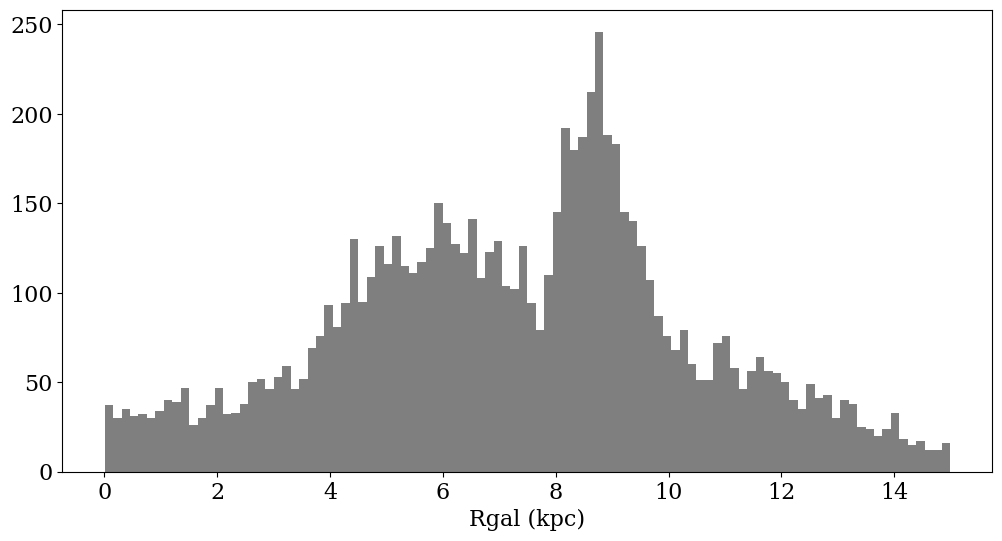

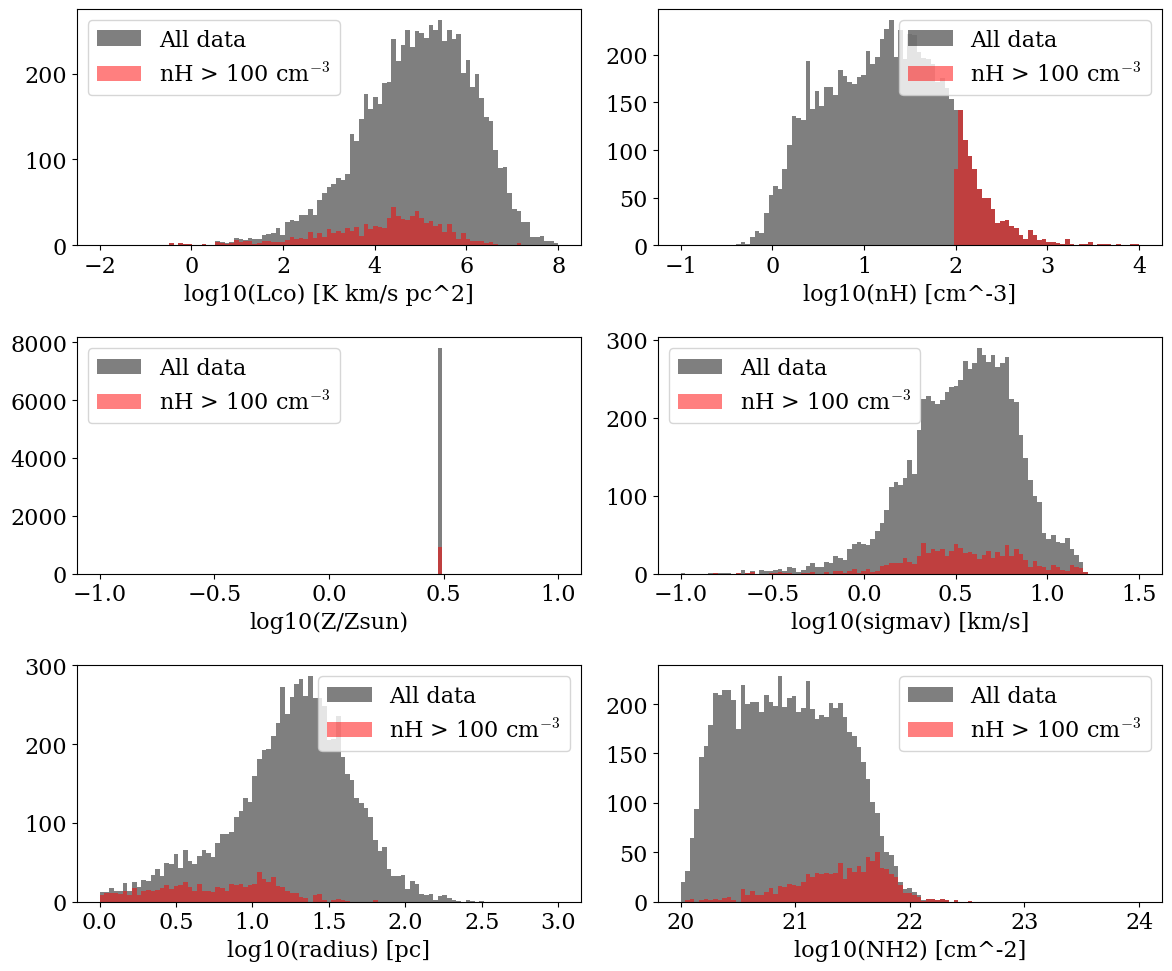

In [3]:
plt.hist(
    miville_deschenes_2017['Rgal'], bins = 100, alpha = 0.5, 
    label = "Miville-Deschênes et al. (2017)", 
    color = "black"
)

plt.xlabel("Rgal (kpc)")
plt.show()

fig, axs = plt.subplots(3, 2, figsize=(12, 10))
axs = axs.flatten()
# columns = ['Lco', 'hden', 'metallicity', 'turbulence', 'radius']

columns = {
    'Lco': {
        "column_name": "Lco",
        "bins": np.linspace(-2, 8, 100),
        "xlabel": "log10(Lco) [K km/s pc^2]",
    }, 
    'hden': {
        "column_name": "hden",
        "bins": np.linspace(-1, 4, 100),
        "xlabel": "log10(nH) [cm^-3]",
    },
    'metallicity': {
        "column_name": "metallicity",
        "bins": np.linspace(-1, 1, 100),
        "xlabel": "log10(Z/Zsun)",
    },
    'turbulence': {
        "column_name": "turbulence",
        "bins": np.linspace(-1, 1.5, 100),
        "xlabel": "log10(sigmav) [km/s]", 
    },
    'radius': {
        "column_name": "radius",
        "bins": np.linspace(0, 3, 100),
        "xlabel": "log10(radius) [pc]",
    },
    'Nh2': {
        "column_name": "NH2",
        "bins": np.linspace(20, 24, 100),
        "xlabel": "log10(NH2) [cm^-2]",
    }
}

for i, (key, value) in enumerate(columns.items()):
    ax = axs[i]
    
    column_name = value["column_name"]
    ax.hist(
        np.log10(miville_deschenes_2017[column_name]), bins = value['bins'], alpha = 0.5, 
        color = "black",
        label = "All data"
    )
    condition = (np.log10(miville_deschenes_2017['hden']) > 2)
    ax.hist(
        np.log10(miville_deschenes_2017[condition][column_name]), bins = value['bins'], alpha = 0.5, 
        color = "red", 
        label = "nH > 100 cm$^{-3}$"
    )
    ax.legend()
    ax.set_xlabel(value["xlabel"])

plt.tight_layout()

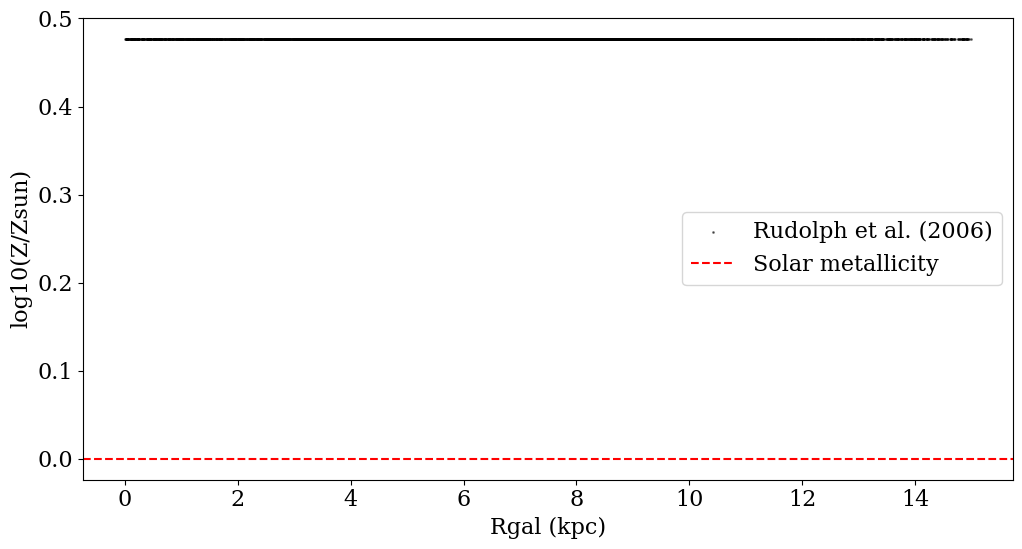

In [4]:
plt.scatter(
    miville_deschenes_2017['Rgal'], 
    np.log10(miville_deschenes_2017['metallicity']), 
    s = 1, alpha = 0.5, color = "black", label = "Rudolph et al. (2006)"
)
plt.xlabel("Rgal (kpc)")
plt.ylabel("log10(Z/Zsun)")
plt.axhline(0, color = "red", ls = "--", label = "Solar metallicity")
plt.legend()

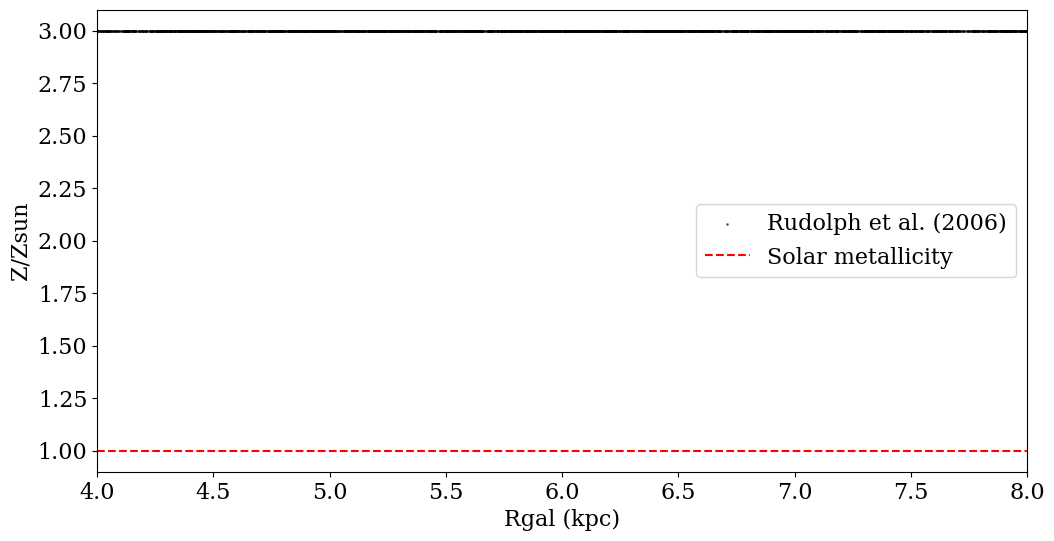

In [5]:
plt.scatter(
    miville_deschenes_2017['Rgal'], 
    miville_deschenes_2017['metallicity'], 
    s = 1, alpha = 0.5, color = "black", label = "Rudolph et al. (2006)"
)
plt.xlim(4,8)
# plt.ylim(-0.2, 0.6)
plt.xlabel("Rgal (kpc)")
plt.ylabel("Z/Zsun")
plt.axhline(1, color = "red", ls = "--", label = "Solar metallicity")
plt.legend()

In [ ]:
# Crete centers. 


# Get the centers 
columns = [
    'metallicity',
    'hden',
    'turbulence',
    'isrf',
    'radius'
]

centers = miville_deschenes_2017[columns].copy()


for i, column in enumerate(columns):
    new_column_name = f"log_{column}"
    centers[new_column_name] = np.log10(centers[column])
    columns[i] = new_column_name
    
centers = centers[columns].to_numpy()
# Write to a file 
# base_fdir = f"/scratch/dtolgay/cloudy_runs/z_0/miville_deschenes_2017_metallicity3"
base_fdir = f"/scratch/dtolgay/cloudy_runs/z_0/miville_deschenes_2017"
fname_centers = f"{base_fdir}/centers.txt"


header_centers = f"""Centers for cloudy runs

The gas particles used in here belong to the molecular clouds reported in Marc-Antoine Miville-Deschênes+2017.
https://ui.adsabs.harvard.edu/abs/2017ApJ...834...57M/abstract
Scale length is {columns[-1]}

Column 0: log_metallicity [log(Zsolar)]
Column 1: log_hden [log(cm^-3)]
Column 2: log_turbulence [log(km/s)]
Column 3: log_isrf [log(G0)]
Column 4: log_radius [log(pc)]
"""

np.savetxt(fname=fname_centers, X=centers, fmt="%.8e", header=header_centers)

print(f"File written to {fname_centers}")


###########################################


# Save all data 
data = miville_deschenes_2017.copy()
data_fname = f"{base_fdir}/all_data.txt"
data.to_csv(data_fname, index = False)
print(f"File written to {data_fname}")

File written to /scratch/dtolgay/cloudy_runs/z_0/miville_deschenes_2017_metallicity3/centers.txt
File written to /scratch/dtolgay/cloudy_runs/z_0/miville_deschenes_2017_metallicity3/all_data.txt
